## Importing the necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from keras import models, layers
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation,Dropout,Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization
%matplotlib inline

2022-12-15 00:43:31.036072: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Directory assignment

In [2]:
train_dir = r'Emergency_Vehicles/train' 
test_dir = r'Emergency_Vehicles/test' 

## Reading the first image

In [3]:
image = cv2.imread(r'Emergency_Vehicles/train/1.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # converting to RGB In [4]:

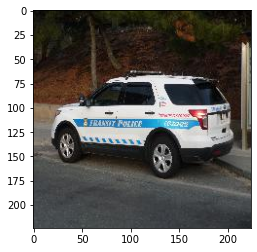

In [4]:
plt.imshow(image) 

In [5]:
image.shape

(224, 224, 3)

## Preprocessing

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
image_gen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.20,
    zoom_range = 0.20,
    fill_mode = 'nearest',
    horizontal_flip = True,
    rescale = 1/255
)

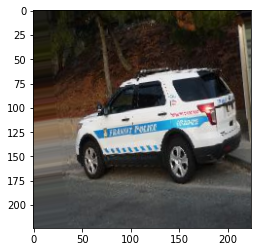

In [8]:
plt.imshow(image_gen.random_transform(image))

In [9]:
train_df = pd.read_csv(r'Emergency_Vehicles/train.csv')
test_df = pd.read_csv(r'Emergency_Vehicles/test.csv')

In [10]:
train_df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [11]:
# labels to string
train_df['emergency_or_not'] = train_df['emergency_or_not'].astype(str)
test_df['emergency_or_not'] = test_df['emergency_or_not'].astype(str)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [13]:
#  instantiate generator
image_gen = ImageDataGenerator(  
    rotation_range=20,# specifies the rotation to be 20% 
    width_shift_range=0.1, # specifies the width shift of 10% 
    height_shift_range=0.1,# specifies the height shift of 10% 
    shear_range=0.20, # crops part of the image  
    zoom_range=0.20, # #zooms the image by 20% 
    fill_mode='nearest', # fills using the nearest pixel  
    horizontal_flip=True, # Secifies the horizontal flip  
    rescale=1/255)

In [14]:
train_generator=image_gen.flow_from_dataframe(dataframe=train_df[:1150], # specify the dataset used for trainin
                                                 directory=train_dir, # specify the path to the directory
                                                 x_col='image_names', # specify the names of the images
                                                 y_col='emergency_or_not', # specifies the class labels
                                                 class_mode='binary', # specifies the kind of classification
                                                 target_size=(224,224), # specifies the dimension to resize the im
                                                 batch_size=50# defines the batch size
                                                 )
validation_generator=image_gen.flow_from_dataframe(dataframe=train_df[1150:], # specify the dataset used for tr
                                                     directory=train_dir, # specify the path to the directory
                                                     x_col='image_names', # specify the names of the images
                                                     y_col='emergency_or_not', # specifies the class labels
                                                     class_mode='binary', # specifies the kind of classification
                                                     target_size=(224,224), # specifies the dimension to resize the im
                                                     batch_size=50 # defines the batch size
                                                     )

Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


## Constructor stage

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(filters=5, kernel_size=(3,3), padding='same', 
                        activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=100, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=1, activation='sigmoid'))

2022-12-15 00:43:44.733311: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
#  model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 5)       140       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 5)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 100)               6272100   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                        

In [17]:
# model with more layers
model_2 = models.Sequential()
model_2.add(layers.Conv2D(filters=5, kernel_size=(3,3), padding='same', activation='relu', input_shape=(224, 224, 3)))
model_2.add(layers.MaxPool2D(pool_size=(2,2)))
model_2.add(layers.Conv2D(filters=12, kernel_size=(3,3), padding='same', activation='relu'))
model_2.add(layers.MaxPool2D(pool_size=(2,2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(units=100, activation='relu'))
model_2.add(layers.Dropout(0.2))
model_2.add(layers.Dense(units=1, activation='sigmoid'))

In [18]:
#  model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 5)       140       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 112, 112, 5)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 12)      552       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 56, 56, 12)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 37632)             0         
                                                                 
 dense_2 (Dense)             (None, 100)              

## Compilation and Training  stage

In [21]:
# compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [22]:
# fit
history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)

/var/folders/g2/9mhdxs7d6q1btr76jfgptqqr0000gn/T/ipykernel_3488/1920984969.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
23/23 [==============================] - 26s 1s/step - loss: 1.4801 - accuracy: 0.5878 - val_loss: 0.5672 - val_accuracy: 0.7097
Epoch 2/10
23/23 [==============================] - 28s 1s/step - loss: 0.6203 - accuracy: 0.6739 - val_loss: 0.5516 - val_accuracy: 0.7238
Epoch 3/10
23/23 [==============================] - 23s 1000ms/step - loss: 0.5817 - accuracy: 0.7113 - val_loss: 0.5389 - val_accuracy: 0.7399
Epoch 4/10
23/23 [==============================] - 24s 1s/step - loss: 0.5779 - accuracy: 0.7043 - val_loss: 0.5421 - val_accuracy: 0.7419
Epoch 5/10
23/23 [==============================] - 24s 1s/step - loss: 0.5702 - accuracy: 0.7287 - val_loss: 0.5401 - val_accuracy: 0.7540
Epoch 6/10
23/23 [==============================] - 24s 1s/step - loss: 0.5823 - accuracy: 0.6835 - val_loss: 0.5379 - val_accuracy: 0.7560
Epoch 7/10
23/23 [==============================] - 24s 1s/step - loss: 0.5713 - accuracy: 0.6957 - val_loss: 0.5157 - val_accuracy: 0.7581
Epoch 8/10
23/23

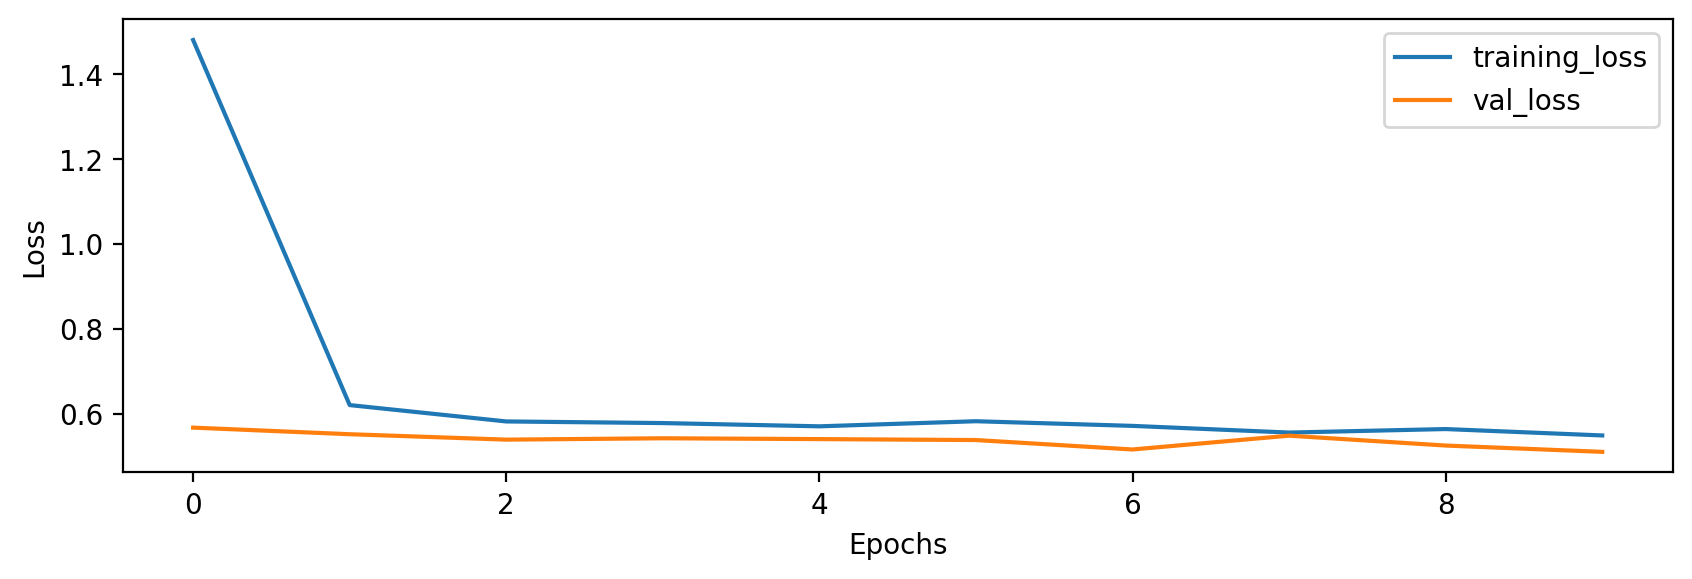

In [23]:
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (10,3))
plt.plot(history_df['loss'],
         label='training_loss')
plt.plot(history_df['val_loss'],
         label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
#  compile and train model2
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

history_2= model_2.fit_generator(train_generator, epochs=10, validation_data=validation_generator)

/var/folders/g2/9mhdxs7d6q1btr76jfgptqqr0000gn/T/ipykernel_3488/3720998460.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_2= model_2.fit_generator(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
23/23 [==============================] - 27s 1s/step - loss: 0.9149 - accuracy: 0.5609 - val_loss: 0.6614 - val_accuracy: 0.6069
Epoch 2/10
23/23 [==============================] - 31s 1s/step - loss: 0.6256 - accuracy: 0.6609 - val_loss: 0.5683 - val_accuracy: 0.7218
Epoch 3/10
23/23 [==============================] - 24s 1s/step - loss: 0.5906 - accuracy: 0.7078 - val_loss: 0.5560 - val_accuracy: 0.7238
Epoch 4/10
23/23 [==============================] - 23s 991ms/step - loss: 0.5779 - accuracy: 0.6965 - val_loss: 0.5128 - val_accuracy: 0.7601
Epoch 5/10
23/23 [==============================] - 24s 1s/step - loss: 0.5631 - accuracy: 0.7217 - val_loss: 0.5091 - val_accuracy: 0.7581
Epoch 6/10
23/23 [==============================] - 25s 1s/step - loss: 0.5532 - accuracy: 0.7113 - val_loss: 0.5110 - val_accuracy: 0.7359
Epoch 7/10
23/23 [==============================] - 23s 1s/step - loss: 0.5560 - accuracy: 0.7191 - val_loss: 0.4721 - val_accuracy: 0.7722
Epoch 8/10
23/23 

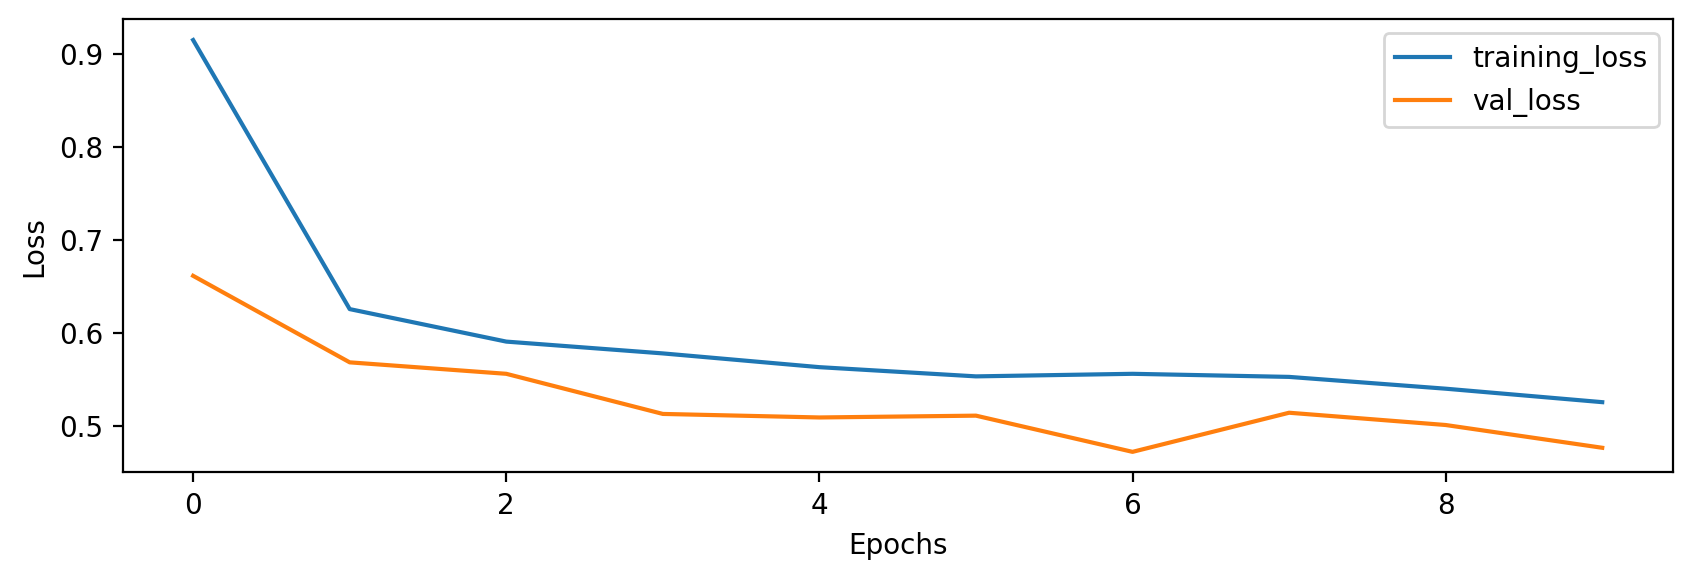

In [26]:
history_2_df = pd.DataFrame(history_2.history)
plt.figure(dpi=200, figsize = (10,3))
plt.plot(history_2_df['loss'],
         label='training_loss')
plt.plot(history_2_df['val_loss'],
         label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Evaluation Stage

In [27]:
test_generator=image_gen.flow_from_dataframe(dataframe=test_df, # specify the dataset used for tr
                                              directory=test_dir, # specify the path to the directory 
                                              x_col='image_names', # specify the names of the images
                                              y_col='emergency_or_not', # specifies the class labels
                                              class_mode='binary', # specifies the kind of classification 
                                              target_size=(224,224), # specifies the dimension to resize the im
                                              batch_size=706) # defines the batch size

Found 706 validated image filenames belonging to 2 classes.


In [28]:
# assigning the prediction to a variable for further evaluation
preds = model.predict(test_generator[0][0])

23/23 [==============================] - 2s 86ms/step


In [29]:
#converts a list of predicted probabilities to a list of predicted classes
preds = [0 if x[0] < 0.5 else 1 for x in preds]

In [30]:
#true labels
test_true_labels = test_generator[0][1]

              precision    recall  f1-score   support

         0.0       0.74      0.85      0.79       408
         1.0       0.74      0.59      0.65       298

    accuracy                           0.74       706
   macro avg       0.74      0.72      0.72       706
weighted avg       0.74      0.74      0.73       706



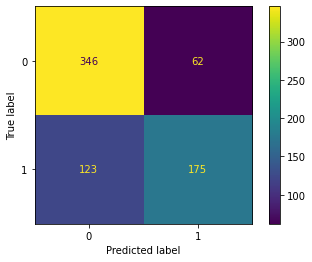

In [31]:
#classification report for the model's predictions
print(classification_report(test_true_labels, preds))

# create a confusion matrix
con_mrtx = confusion_matrix(test_true_labels, preds)

# create a ConfusionMatrixDisplay object
mtrx_ax = ConfusionMatrixDisplay(con_mrtx)

# plot the confusion matrix
mtrx_ax.plot()

In [32]:
#deeper model
# assigning the prediction to a variable for further evaluation
preds = model_2.predict(test_generator[0][0])

23/23 [==============================] - 2s 100ms/step


In [33]:
#converts a list of predicted probabilities to a list of predicted classes
preds = [0 if x[0] < 0.5 else 1 for x in preds]

In [34]:
# true labels
true_labels = test_generator[0][1]

              precision    recall  f1-score   support

         0.0       0.76      0.77      0.77       408
         1.0       0.68      0.67      0.68       298

    accuracy                           0.73       706
   macro avg       0.72      0.72      0.72       706
weighted avg       0.73      0.73      0.73       706



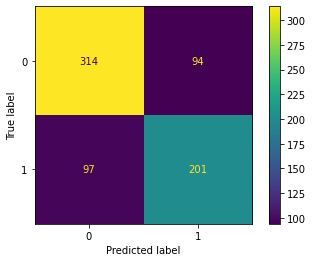

In [35]:
#classification report for the model's predictions
print(classification_report(true_labels, preds))

# create a confusion matrix
con_mrtx = confusion_matrix(true_labels, preds)

# create a ConfusionMatrixDisplay object
mtrx_ax = ConfusionMatrixDisplay(con_mrtx)

# plot the confusion matrix
mtrx_ax.plot()